# 研究步驟說明
第一步: 爬M平方 https://sc.macromicro.me/charts/data/39185 (2022為例)  
目前會遇到麻煩，所以用瀏覽器碰運氣抓，另存json 後製。  
第二步: 將JSON的 數列資訊轉譯成 pd.dataframe , 再彼此用時間當index 合併。  
第三步: 跟兩年債價格日資料做合併。  
第四步: 看能否比對最大概率的欄位與兩年債價格間的關係，找到策略發想點。  

From: https://sc.macromicro.me/search?q=FedWatch GET:  
https://sc.macromicro.me/charts/data/3614 (2018)  
https://sc.macromicro.me/charts/data/6666 (2019)  
https://sc.macromicro.me/charts/data/15722 (2020)  
https://sc.macromicro.me/charts/data/26749 (2021)  
https://sc.macromicro.me/charts/data/39185 (2022)  

# Tools:  
Json編譯器: http://json.parser.online.fr/  
CME FedWatch: https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html#resources  


In [40]:
# # -*- coding: utf-8 -*-
# import requests
# from bs4 import BeautifulSoup

# # use get method to request  

# response = requests.get('https://sc.macromicro.me/charts/data/3614')

# # change encoding to uft-8
# response.encoding = 'utf-8'

# print('status code is: {}'.format(response.status_code))
# print('response html is: \n {}'.format(response.text))


In [92]:
import pandas as pd
import json
from datetime import datetime
import csv
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

# 2022

In [93]:
file_name = "D:\\實習\\統一期貨\\工作\\bond\\39185.json"

with open(file_name, 'r', encoding='utf-8') as f:
    my_data = json.load(f)
    print(my_data['data']['c:39185']['c'][0]['stats'][0]['stat_name']) 
    a = my_data['data']['c:39185']['s'][0]

美國-升息機率- 2.25 - 2.50區間 (2022)


In [94]:
data = pd.DataFrame(a, columns = ['date', '美國-升息機率- 2.25 - 2.50區間 (2022)'])

for j in range(len(data)):
        data.loc[j, 'date'] = datetime.strptime(data.loc[j, 'date'], "%Y-%m-%d")
        
data['美國-升息機率- 2.25 - 2.50區間 (2022)'] = data['美國-升息機率- 2.25 - 2.50區間 (2022)'].astype(float)

In [95]:
for i in range(1, len(my_data['data']['c:39185']['c'])):
    
    column_name = my_data['data']['c:39185']['c'][i]['stats'][0]['stat_name']
    prob = my_data['data']['c:39185']['s'][i]
        
    df = pd.DataFrame(prob, columns = ['date', column_name])
    
    for j in range(len(df)):
        df.loc[j, 'date'] = datetime.strptime(df.loc[j, 'date'], "%Y-%m-%d")
        
    df[column_name] = df[column_name].astype(float)
    
    data = pd.merge(data, df, on = 'date', how = 'left')
data['date'] = pd.to_datetime(data['date'])

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21319 (\N{CJK UNIFIED IDEOGRAPH-5347}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

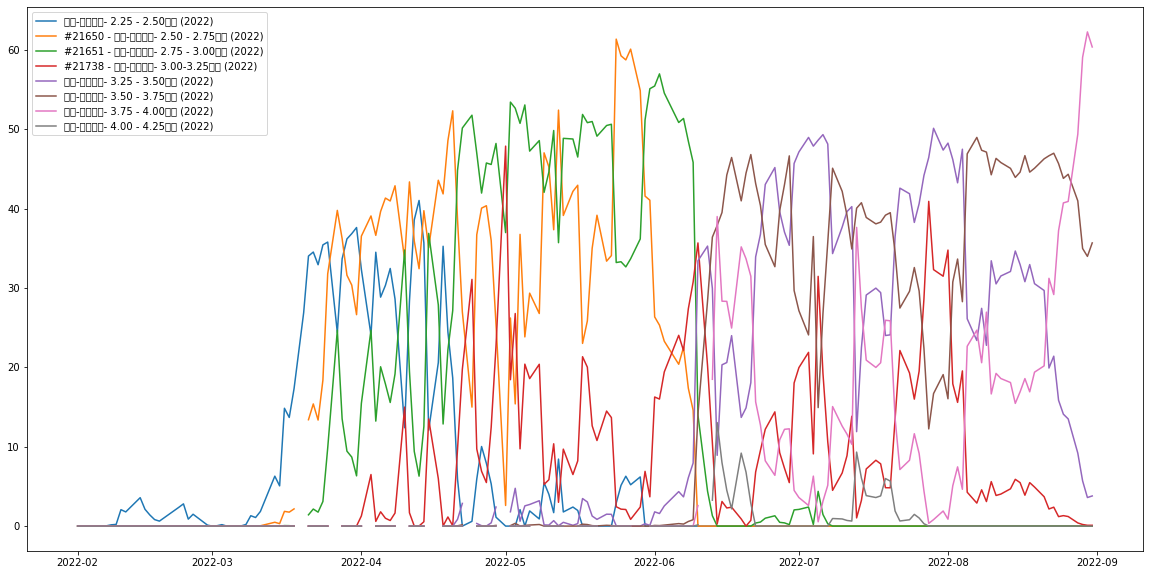

In [97]:
plt.figure(figsize = (20, 10))

for i in range(1, len(data.columns)):
    plt.plot(data['date'], data[data.columns[i]])

plt.legend(data.columns[1:])
plt.show()

In [ ]:
# [3614,6666, 15722, 26749, 39185]

In [74]:
data_set = [3614,6666, 15722, 26749, 39185]

for d in data_set:
    file_name = "D:\\實習\\統一期貨\\工作\\bond\\" + str(d) + ".json"

    with open(file_name, 'r', encoding='utf-8') as f:
        my_data = json.load(f)
        #c
        c_name = my_data['data']["c:" + str(d)]['c'][0]['stats'][0]['stat_name']
        # print(c_name) 

        #s
        a = my_data['data']['c:'+ str(d)]['s'][0]

    #每年的第一條線
    data = pd.DataFrame(a, columns = ['date', c_name])

    for j in range(len(data)):
        data.loc[j, 'date'] = datetime.strptime(data.loc[j, 'date'], "%Y-%m-%d")
        
    data[c_name] = data[c_name].astype(float)

    #每年剩下的線
    for i in range(1, len(my_data['data']['c:'+ str(d)]['c'])):
    
        column_name = my_data['data']['c:'+ str(d)]['c'][i]['stats'][0]['stat_name']
        prob = my_data['data']['c:'+ str(d)]['s'][i]
        
        df = pd.DataFrame(prob, columns = ['date', column_name])
    
        for k in range(len(df)):
            df.loc[k, 'date'] = datetime.strptime(df.loc[k, 'date'], "%Y-%m-%d")
        
        df[column_name] = df[column_name].astype(float)

        #合併所有線
        data = pd.merge(data, df, on = 'date', how = 'left')
    
    data['date'] = pd.to_datetime(data['date'])
   

    #寫進csv
    with open("D:\\實習\\統一期貨\\工作\\bond\\" +str(d)+ ".csv",'w') as file:

        data.to_csv("D:\\實習\\統一期貨\\工作\\bond\\" +str(d)+ ".csv", index = False, encoding = 'utf-8-sig')

    print(str(d) + " success")

3614 success
6666 success
15722 success
26749 success
39185 success


In [75]:
# plt.figure(figsize = (20, 10))

# for i in range(1, len(data.columns)):
#     plt.plot(data['date'], data[data.columns[i]])

# plt.legend(data.columns[1:])
# plt.show()

In [76]:
# # Import pandas library
# import pandas as pd
 
# # Create the pandas DataFrame
# df = pd.DataFrame(a, columns = ['Date', 'Prob'])
 
# # print dataframe.
# print(type(df.iloc[0]['Date']))

In [77]:
# import datatable as dt # for better i/o operations, use datatable
# dsk_df=dt.Frame(df)
# dsk_df.to_csv('test.csv')

In [78]:
# dsk_df=dt.fread('test.csv')
# dsk_dfa=dsk_df.to_pandas()
# dsk_df